<a href="https://colab.research.google.com/github/salouaelhodifi/NLP/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Charger le fichier Excel
import pandas as pd
df=pd.read_excel('/content/Dataset with sentiment.xlsx')
df.head()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.columns

Index(['Moroccan Sentiment  Analysis Corpus', 'label'], dtype='object')

In [ ]:
!pip install pyarabic
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
from nltk.classify import textcat
import re
import pyarabic.araby as araby
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import unidecode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Fonction pour supprimer la ponctuation, les caractères spéciaux et les emojis

def remove_special_chars(text):
    cleaned_text = re.sub(r'[^\w\s]|[\U0001F600-\U0001F6FF]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F1E0-\U0001F1FF]', ' ', text)
    return cleaned_text
# Fonction pour enlever les urls
def remove_urls(text) :
    Text=re.sub(r"https?:\/\/t.co\/[A-Za-z0-9)+",' ',text)
    return text
# Fonction pour enlever les diacritique
def remove_diacritiques(text):
        regex = re.compile(r'[\u064B\u064C\u064D\u064F\u0650\u0651\u0652]')
        return re.sub(regex, ' ' ,text)


# Normaliser les caractères arabes
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ | # Tashdid َ | # Fatha ً | # Tanwin Fath ُ | # Damma ٌ | # Tanwin Damm ِ | # Kasra ٍ | # Tanwin Kasr ْ | # Sukun ـ # Tatwil/Kashida """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

# Fonction pour supprimer les mots vides (stop words)
def remove_stopwords(text):
    stop_words = set(stopwords.words('arabic'))
    cleaned_text = ' '.join(word for word in text.split() if word not in stop_words)
    return cleaned_text

# toekenisation
nltk.download("punkt")
def tokenize(text):
  tokens=nltk.word_tokenize(str(text))
  return [w for w in tokens if w.isalpha()]




from tashaphyne.stemming import ArabicLightStemmer
def stemmatisation_arabe(text):
    # Instancier les stemmers
    light_stemmer = ArabicLightStemmer()
    # Stemmatiser la data avec ArabicLightStemmer
    stemmed_data_light = light_stemmer.light_stem(str(text))
    return stemmed_data_light


# Votre dataset à raciniser


# Chargement du DataFrame


# Appliquer les transformations sur la colonne 'Moroccan Sentiment Analysis Corpus'
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment  Analysis Corpus'].apply(remove_special_chars)
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment Analysis Corpus_prétraité'].apply(remove_diacritiques)
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment Analysis Corpus_prétraité'].apply(remove_urls)
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment Analysis Corpus_prétraité'].str.replace("[0123456789_]"," ")#removing numbers
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment Analysis Corpus_prétraité'].apply(remove_stopwords)
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment Analysis Corpus_prétraité'].apply(normalizeArabic)
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment Analysis Corpus_prétraité'].apply(tokenize)
df['Moroccan Sentiment Analysis Corpus_prétraité'] = df['Moroccan Sentiment Analysis Corpus_prétraité'].apply(stemmatisation_arabe)

# Afficher le résultat
print(df.to_string(index=True, header=True))

ModuleNotFoundError: ignored

In [ ]:
df

,Moroccan Sentiment Analysis Corpus,label,Moroccan Sentiment Analysis Corpus_prétraité
0,'طوال حياتي لم المس اي تغير حتى قدمت هذه الحكو...,pos,"['طوال', 'حياتي', 'المس', 'اي', 'تغير', 'قدمت'..."
1,'منتوج رائع وثمن مناسب ....جميل',pos,"['منتوج', 'راءع', 'وثمن', 'مناسب', 'جميل']"
2,'كلنا ابن كيران لمتافق معايا يدير جيم',pos,"['كلنا', 'ابن', 'كيران', 'لمتافق', 'معايا', 'ي..."
3,'وفقك الله لولاية اخرى حقاش مكينش محسن منك',pos,"['وفقك', 'الله', 'لولايه', 'اخري', 'حقاش', 'مك..."
4,'لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخ...,pos,"['لانه', 'بكل', 'بساطه', 'رءيس', 'الحكومه', 'ي..."
...,...,...,...
1995,'اصمت لعلى صمتك راحة بالنسبة لهم',neg,"['اصمت', 'لعلي', 'صمتك', 'راحه', 'بالنسبه']"
1996,'حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظ...,neg,"['حديقه', 'حيوانات', 'ولازال', 'اناس', 'يءمنون..."
1997,'أفعى بجدارة تريثت تربصت وكان الفحيح متعة له ص...,neg,"['افعي', 'بجداره', 'تريثت', 'تربصت', 'وكان', '..."
1998,'لا يقطع الرأس غير الي ركبه الان اصبح تركيب ال...,neg,"['يقطع', 'الراس', 'الي', 'ركبه', 'الان', 'اصبح..."


<Axes: xlabel='label', ylabel='count'>

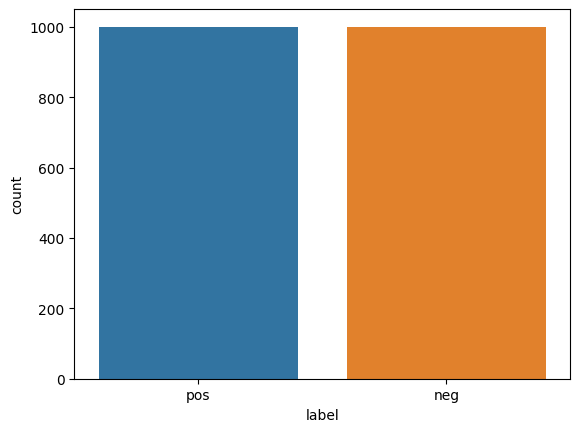

In [ ]:
#VISUALIZATION

sns.countplot(x="label",data=df)

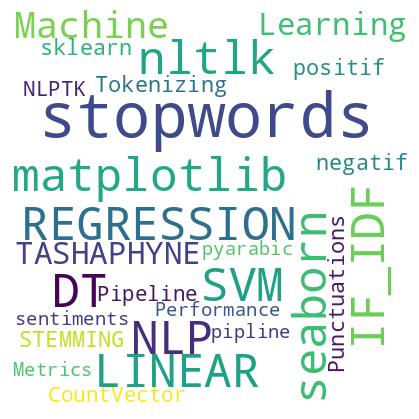

In [ ]:
#the WordCloud image of keywords


cloud_data = ["NLP","DT","stopwords","seaborn","matplotlib","nltlk","LINEAR REGRESSION","SVM","IF_IDF","Machine Learning","TASHAPHYNE","Tokenizing","StopWords","Punctuations","positif","negatif","sklearn","STEMMING","CountVector","NLPTK","Pipeline","Performance Metrics", "sentiments","pipline","pyarabic",]
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(' '.join(cloud_data))

# plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=ee6633ca7ff972f6edc5dbf886e561db900816806cc57d42bb051ba9ea77f869
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


input_data = df['Moroccan Sentiment Analysis Corpus_prétraité']
output_data = df['label']

train_data, test_data, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, random_state=101)
tfidf = TfidfVectorizer()
tfidf_text_train = tfidf.fit_transform(train_data.values.astype('U'))
tfidf_text_test = tfidf.transform(test_data.values.astype('U'))

In [ ]:
text_example = ' رائع جميل'
print(tfidf.transform([text_example]))

  (0, 3523)	1.0


##support vector machine

In [ ]:
#model SVC

linear_svc = LinearSVC()
linear_svc.fit(tfidf_text_train,train_output)
predictions_svc = linear_svc.predict(tfidf_text_test)



In [ ]:
#pipline for svm
positive_or_negative_svc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('linear_svc', LinearSVC()),])

positive_or_negative_svc.fit(train_data,train_output)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('linear_svc', LinearSVC())])

In [ ]:
pred_svc = positive_or_negative_svc.predict(test_data)

In [ ]:
#PERFORMANCE METRICS
print(classification_report(test_output,pred_svc))

              precision    recall  f1-score   support

         neg       0.81      0.85      0.83       218
         pos       0.81      0.76      0.78       182

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



##logistic regression

In [ ]:
#model lr

Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(tfidf_text_train,train_output)
predictions_lr = Logistic_Regression.predict(tfidf_text_test)


#pipline for LogisticRegression
positive_or_negative_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('Logistic_Regression',LogisticRegression()),])

positive_or_negative_lr.fit(train_data,train_output)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Logistic_Regression', LogisticRegression())])

In [ ]:
pred_lr = positive_or_negative_lr.predict(test_data)

In [ ]:
#PERFORMANCE METRICS
print(classification_report(test_output,pred_lr))

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       218
         pos       0.81      0.74      0.77       182

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



##decision tree

In [ ]:

#model decision tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(tfidf_text_train,train_output)
predictions_decision_tree = decision_tree.predict(tfidf_text_test)


#pipline for decision tree
positive_or_negative_decision_tree = Pipeline([('tfidf', TfidfVectorizer()),
                     ('decision_tree',DecisionTreeClassifier()),])

positive_or_negative_decision_tree.fit(train_data,train_output)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('decision_tree', DecisionTreeClassifier())])

In [ ]:
pred_decision_tree = positive_or_negative_decision_tree.predict(test_data)

In [ ]:
#PERFORMANCE METRICS
print(classification_report(test_output,pred_decision_tree))

              precision    recall  f1-score   support

         neg       0.82      0.55      0.66       218
         pos       0.61      0.86      0.71       182

    accuracy                           0.69       400
   macro avg       0.72      0.70      0.68       400
weighted avg       0.73      0.69      0.68       400



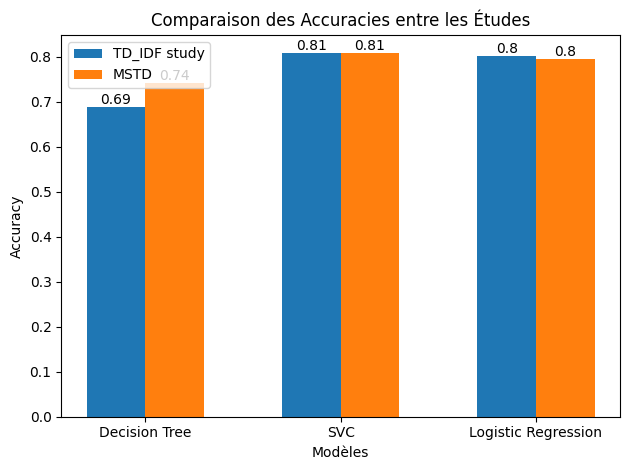

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Obtention des prédictions pour chaque modèle
pred_decision_tree = positive_or_negative_decision_tree.predict(test_data)
pred_svc = positive_or_negative_svc.predict(test_data)
pred_lr = positive_or_negative_lr.predict(test_data)

# Obtention du rapport de classification pour chaque modèle
report_decision_tree = classification_report(test_output, pred_decision_tree, output_dict=True)
report_svc = classification_report(test_output, pred_svc, output_dict=True)
report_lr = classification_report(test_output, pred_lr, output_dict=True)

# Extraction des valeurs d'accuracy pour chaque modèle
accuracy_decision_tree = report_decision_tree['accuracy']
accuracy_svc = report_svc['accuracy']
accuracy_lr = report_lr['accuracy']

# Nouvelles précisions pour l'autre étude
accuracy_decision_tree_other = 0.7412
accuracy_svc_other = 0.8082
accuracy_lr_other = 0.7954

# Création des listes d'accuracies pour les deux études
accuracies_current_study = [accuracy_decision_tree, accuracy_svc, accuracy_lr]
accuracies_other_study = [accuracy_decision_tree_other, accuracy_svc_other, accuracy_lr_other]

# Création des listes de labels de modèle
model_labels = ['Decision Tree', 'SVC', 'Logistic Regression']

# Création de la figure
fig, ax = plt.subplots()

# Plot des barres pour l'étude courante
ax.bar([i - 0.15 for i in range(len(model_labels))], accuracies_current_study, width=0.3, label='TD_IDF study')

# Plot des barres pour l'autre étude
ax.bar([i + 0.15 for i in range(len(model_labels))], accuracies_other_study, width=0.3, label='MSTD')

# Ajout des étiquettes aux barres de l'étude courante
for i, v in enumerate(accuracies_current_study):
    ax.text(i - 0.15, v, str(round(v, 2)), ha='center', va='bottom')

# Ajout des étiquettes aux barres de l'autre étude
for i, v in enumerate(accuracies_other_study):
    ax.text(i + 0.15, v, str(round(v, 2)), ha='center', va='bottom')

# Ajout des titres et des étiquettes d'axe
ax.set_title('Comparaison des Accuracies entre les Études')
ax.set_xlabel('Modèles')
ax.set_ylabel('Accuracy')
ax.set_xticks(range(len(model_labels)))
ax.set_xticklabels(model_labels)

# Ajout de la légende
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


##tester les modèles

In [ ]:
single_test_text ="شنو هاد التخربيق"
positive_or_negative_svc.predict([single_test_text])


array(['neg'], dtype=object)

In [ ]:
single_test_text ="قفطان مزيون و هو مغربي"
positive_or_negative_svc.predict([single_test_text])

array(['pos'], dtype=object)

In [ ]:
single_test_text = "أسوء تنظيم تعليمي هو اللي كاين في أفريقيا"
positive_or_negative_lr.predict([single_test_text])

array(['neg'], dtype=object)

In [ ]:
single_test_text = "جميل رائع"
positive_or_negative_lr.predict([single_test_text])

array(['pos'], dtype=object)

In [ ]:
single_test_text = " كنكره هاد الدرس"
positive_or_negative_decision_tree.predict([single_test_text])

array(['neg'], dtype=object)

In [ ]:
single_test_text ="جميل رائع"
positive_or_negative_decision_tree.predict([single_test_text])

array(['pos'], dtype=object)